### Import modules

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D               #everage하는 것
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### load data 
- #### dataset (x: imdb article -> y: text type) ; x 정보는 imdb에 있는 리뷰 article이고, y는 text type이다      
- #### word2idx dict (key: word; value: index)

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)  # 파일 불러오기
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(25000,)

In [7]:
x_train[0]

#단어 하나의 숫자가 input layer에 들어가는 10000개의 node를 커버한다.
# embedding: 총 256개의 숫자를 256x10000으로 바꿔주는 것
# 리뷰 iput 256x10000 -> weight(10000x128)하면 256x128(128이 hidden layer)(지금 matrix 상태)
# -> vector로 만들어주기 위해 평균작업하면 1x128 (vector 상태)
# 시험문제) 256 x10000의 matrix에서 나타나는 1 또는 0의 숫자는 몇개인가?
# 1의 갯수: 256개, 0의 갯수: 256x10000 - 256 
# 평균작업을 총 몇번을 하는가? 128번


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
word2idx        #단어들을 알 수 있음.

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
y_train[0]

1

1은 '좋아요'를 의미

### modifiy word2idx dict (to reflect x_train, x_text)

In [11]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

### create idx2word: inverse of word2idx

In [12]:
idx2word = {v:k for k, v in word2idx.items()}

### padding x_train, x_test

In [13]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

### create model

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [16]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 23s 1ms/sample - loss: 0.6556 - acc: 0.7119 - val_loss: 0.5879 - val_acc: 0.7857
Epoch 2/10
16750/16750 [==============================] - 20s 1ms/sample - loss: 0.5068 - acc: 0.8275 - val_loss: 0.4464 - val_acc: 0.8377
Epoch 3/10
16750/16750 [==============================] - 21s 1ms/sample - loss: 0.3882 - acc: 0.8685 - val_loss: 0.3699 - val_acc: 0.8619
Epoch 4/10
16750/16750 [==============================] - 22s 1ms/sample - loss: 0.3225 - acc: 0.8869 - val_loss: 0.3305 - val_acc: 0.8737
Epoch 5/10
16750/16750 [==============================] - 21s 1ms/sample - loss: 0.2815 - acc: 0.9013 - val_loss: 0.3074 - val_acc: 0.8807
Epoch 6/10
16750/16750 [==============================] - 20s 1ms/sample - loss: 0.2521 - acc: 0.9116 - val_loss: 0.2937 - val_acc: 0.8850
Epoch 7/10
16750/16750 [==============================] - 20s 1ms/sam

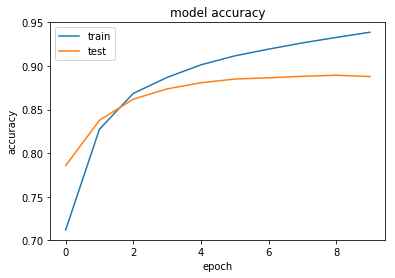

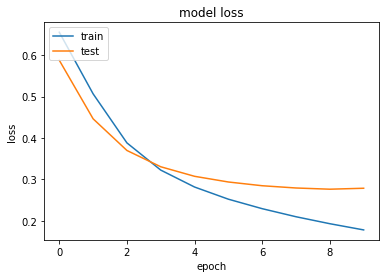

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [21]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 110us/sample - loss: 0.2910 - acc: 0.8800


[0.29101847487449645, 0.88004]

### inference

In [10]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out) 

# <PAD>도 하나의 단어라 생각하며 됨

NameError: name 'idx2word' is not defined

In [ ]:
x_test[100]